In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset= pd.read_csv("/workspaces/codespaces-jupyter/data/UberDataset.csv")

In [8]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [9]:
# shape tell us about how many row are persent and column are present in data
dataset.shape

(1156, 7)

In [10]:
# to know about data we have to know about null value data in table so we use info 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# we now we Know in purpose column there is lots of null value so now we fill it with NOT keyword 

In [11]:
# This command use purpose column from dataset and fill all null values with NOT keywords 
dataset['PURPOSE'].fillna("NOT", inplace=True)

/tmp/ipykernel_2668/4184115069.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


# inplace keyword used for fix the value in current dataset

# now we change start date and end date format

In [12]:
dataset['START_DATE']= pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE']= pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [13]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site


# now we split date an time in columns

In [14]:
from datetime import datetime

dataset['date']= pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time']= pd.DatetimeIndex(dataset['START_DATE']).hour

# changing into categories of day nad night

dataset['day-night']=pd.cut(x=dataset['time'],
                            bins=[0,10,15,19,24],
                            labels=['Morning','Afternoon','Evening','Night'])

# now we are done with create new columns for analysis

In [15]:
# using dropna function its delete all null value rows from dataset
dataset.dropna(inplace=True)

In [16]:
# now we drop duplicate value from dataset using drop_duplicates() function
dataset.drop_duplicates(inplace=True)

In [17]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening


# now we do data visual representation

In [18]:
# now we find uique values in dataset

obj= (dataset.dtypes == 'object')
object_cols= list(obj[obj].index)

unique_values={}

for col in object_cols:
    unique_values[col]= dataset[col].unique().size

unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

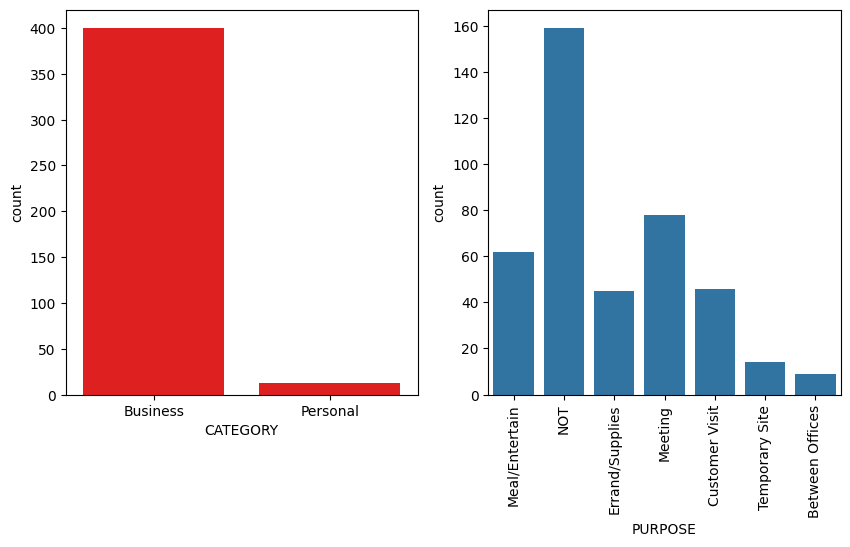

In [42]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=dataset,x='CATEGORY',color='red')
# plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data=dataset,x='PURPOSE')
plt.xticks(rotation=90)

<Axes: xlabel='day-night', ylabel='count'>

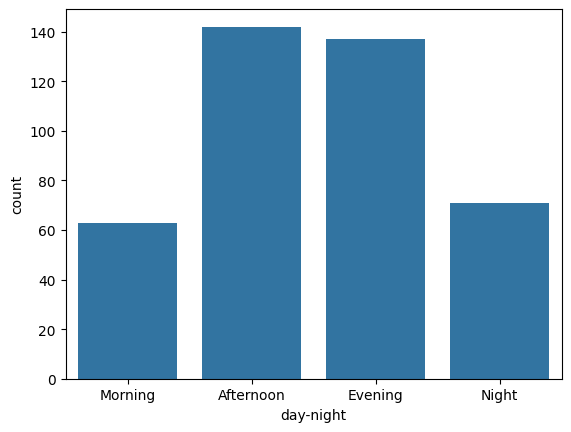

In [43]:
sns.countplot(data=dataset,x='day-night')

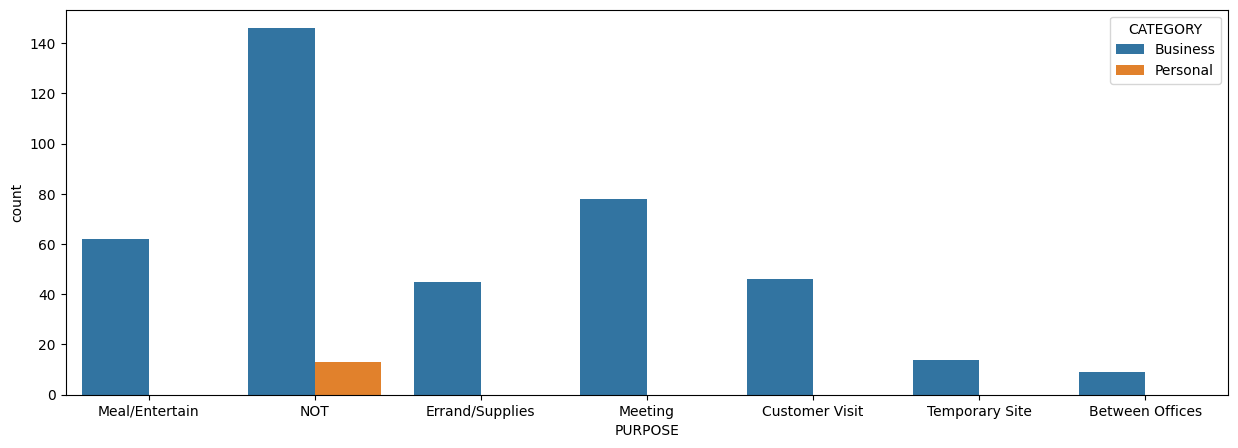

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(data=dataset,x='PURPOSE',hue='CATEGORY')
plt.show()

In [ ]:
#Insight from this Analysis 
#1. Rides book most of time in Afternoon and Evening
#2. Business purpose rides are major portion of booking
# 3. meetings amd meal/Entertainment purpose people books ride 